In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.neighbors import NearestNeighbors
import bigfloat
from decimal import *
import methods


# Lorentz equations

In [8]:
# Parameters
T=4000 #sequence size
sigma=10
beta=8/3
rho=28
dt=0.01

x=np.zeros((T+1))
y=np.zeros((T+1))
z=np.zeros((T+1))
x[0]=0.2*(np.random.rand()-0.5)
y[0]=0.2*(np.random.rand()-0.5)
z[0]=0.2*(np.random.rand()-0.5)

for i in range(T):
    x[i+1]=x[i]+dt*sigma*(y[i]-x[i])
    y[i+1]=y[i]+dt*(x[i]*(rho-z[i])-y[i])
    z[i+1]=z[i]+dt*(x[i]*y[i]-beta*z[i])

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)
ax.plot(z)

%matplotlib qt
fig2=plt.figure()
ax2=fig2.add_subplot(111,projection='3d')
ax2.plot(x,y,z)

In [5]:
def example(X,Y,T,tau,E,L,emsemble):
    rhox=np.zeros((len(L),emsemble))
    rhoy=np.zeros((len(L),emsemble))
    for i in range(len(L)):
        for j in range (emsemble):
            y_pred, y_target, x_pred, x_target = methods.compute_xmap(X,Y,T,E,tau,L[i])
            rhox[i,j]=methods.compute_corr(y_pred,y_target)
            rhoy[i,j]=methods.compute_corr(x_pred,x_target)
    rhox=np.mean(rhox,1)
    rhoy=np.mean(rhoy,1)
    return rhox,rhoy,L

In [12]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140, 150]
emsemble=50

rhox, rhoy, L=example(x,y,T,tau,E,L,emsemble)


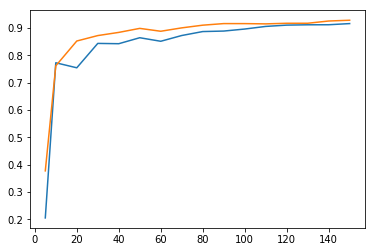

In [13]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoy)